train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7949166666666667, 0.7976
train acc, test acc | 0.8765, 0.8803
train acc, test acc | 0.8979666666666667, 0.9011
train acc, test acc | 0.9080666666666667, 0.9095
train acc, test acc | 0.9143833333333333, 0.9166
train acc, test acc | 0.91975, 0.922
train acc, test acc | 0.9235, 0.9262
train acc, test acc | 0.9270666666666667, 0.9284
train acc, test acc | 0.9300333333333334, 0.9307
train acc, test acc | 0.9336333333333333, 0.9351
train acc, test acc | 0.93685, 0.9372
train acc, test acc | 0.9385, 0.9401
train acc, test acc | 0.9415166666666667, 0.9408
train acc, test acc | 0.9434333333333333, 0.9428
train acc, test acc | 0.94455, 0.9437
train acc, test acc | 0.9470666666666666, 0.9447


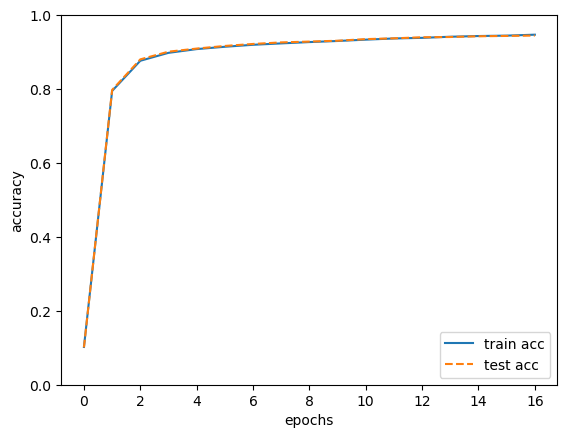

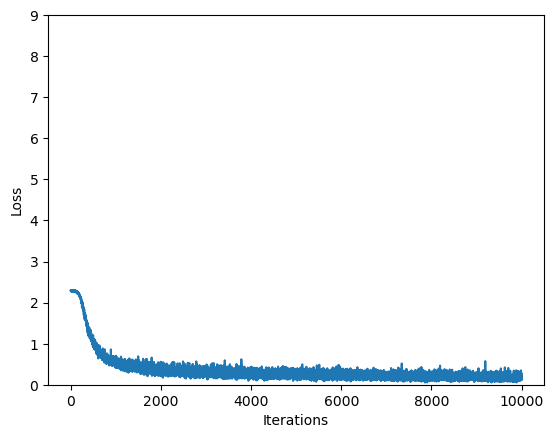

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from layer.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')  
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 손실 함수 값의 추이 그래프
plt.plot(train_loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.ylim(0,9)
plt.show()